In [8]:
import pyautogui as pya
import numpy as np
import cv2
from matplotlib import pyplot as plt
import webbrowser
import time
import pandas as pd
import skimage
import scipy
from skimage.color import label2rgb
from scipy import ndimage as ndi
from skimage import morphology
#use adblockers on browser

# STEP 1 : Get all the URLs to scrap

In [3]:
D_URL={}
D_URL[0]={"URL":"https://www.cellartracker.com/wine.asp?iWine=940"}
D_URL[1]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2383250"}
D_URL[2]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2885171"}
D_URL[3]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2072263"}#
D_URL[4]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2535675"}
D_URL[5]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1903563"}
D_URL[6]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1591674"}
D_URL[7]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2914131"}
D_URL[8]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2951686"}
D_URL[9]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1318271"}
D_URL[10]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2653916"}
D_URL[11]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1195931"}
D_URL[12]={"URL":"https://www.cellartracker.com/wine.asp?iWine=224338"}
D_URL[13]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1128955"}
D_URL[14]={"URL":"https://www.cellartracker.com/wine.asp?iWine=922657"}
D_URL[15]={"URL":"https://www.cellartracker.com/wine.asp?iWine=719747"}
D_URL[16]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2374019"}
D_URL[17]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1546335"}
D_URL[18]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1077567"}
D_URL[19]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1603795"}
D_URL[20]={"URL":"https://www.cellartracker.com/wine.asp?iWine=1122605"}
df=pd.DataFrame(D_URL).T
print(df)

                                                  URL
0    https://www.cellartracker.com/wine.asp?iWine=940
1   https://www.cellartracker.com/wine.asp?iWine=2...
2   https://www.cellartracker.com/wine.asp?iWine=2...
3   https://www.cellartracker.com/wine.asp?iWine=2...
4   https://www.cellartracker.com/wine.asp?iWine=2...
5   https://www.cellartracker.com/wine.asp?iWine=1...
6   https://www.cellartracker.com/wine.asp?iWine=1...
7   https://www.cellartracker.com/wine.asp?iWine=2...
8   https://www.cellartracker.com/wine.asp?iWine=2...
9   https://www.cellartracker.com/wine.asp?iWine=1...
10  https://www.cellartracker.com/wine.asp?iWine=2...
11  https://www.cellartracker.com/wine.asp?iWine=1...
12  https://www.cellartracker.com/wine.asp?iWine=2...
13  https://www.cellartracker.com/wine.asp?iWine=1...
14  https://www.cellartracker.com/wine.asp?iWine=9...
15  https://www.cellartracker.com/wine.asp?iWine=7...
16  https://www.cellartracker.com/wine.asp?iWine=2...
17  https://www.cellartracke

# STEP 2 : Scrap a given URL

In [4]:
d={}
TO_SCROLL=200
TIME_PAUSE=2
TIME_TO_MOVE=0.7
HIGH_CROP=120
DOWN_CROP=60
SIZE_KERNEL=6#default=4 #6
ITER_KERNEL=4 #defaut= 2
SIZE_MIN=100 #500

## STEP 2.1 Screenshot

In [16]:
#example for a given url
#URL="https://www.cellartracker.com/wine.asp?iWine=940"
#URL = "https://www.wine-searcher.com/find/haut+bailly+pessac+leognan+bordeaux+france/2015/france?Xprice=165.50&Xhide_nearest=N"
#URL="https://www.wine-searcher.com/find/e+guigal+cuvee+lieu+dits+st+joseph+rhone+france/2009/france?Xprice=18.00&Xhide_nearest=N"
#URL="https://www.wine-searcher.com/find/louis+jadot+dom+duc+de+magenta+morgeot+clos+la+chapelle+monopole+chass+montrachet+premier+cru+cote/2014/france?Xprice=28.00&Xhide_nearest=N"
#URL="https://www.cellartracker.com/wine.asp?iWine=2383250"
URL="https://www.cellartracker.com/wine.asp?iWine=922657"
UNIQUE_ID=1
PICTURE=str(UNIQUE_ID)+".png"
HTML=str(UNIQUE_ID)+".html"
d[UNIQUE_ID]={"URL":URL,"PICTURE":PICTURE,"HTML":HTML}
screenWidth, screenHeight = pya.size()
currentMouseX, currentMouseY = pya.position()
pya.moveTo(0, screenHeight / 2)
webbrowser.open(URL)
time.sleep(TIME_PAUSE)
pya.scroll(-TO_SCROLL)
time.sleep(.5)
im2=pya.screenshot()

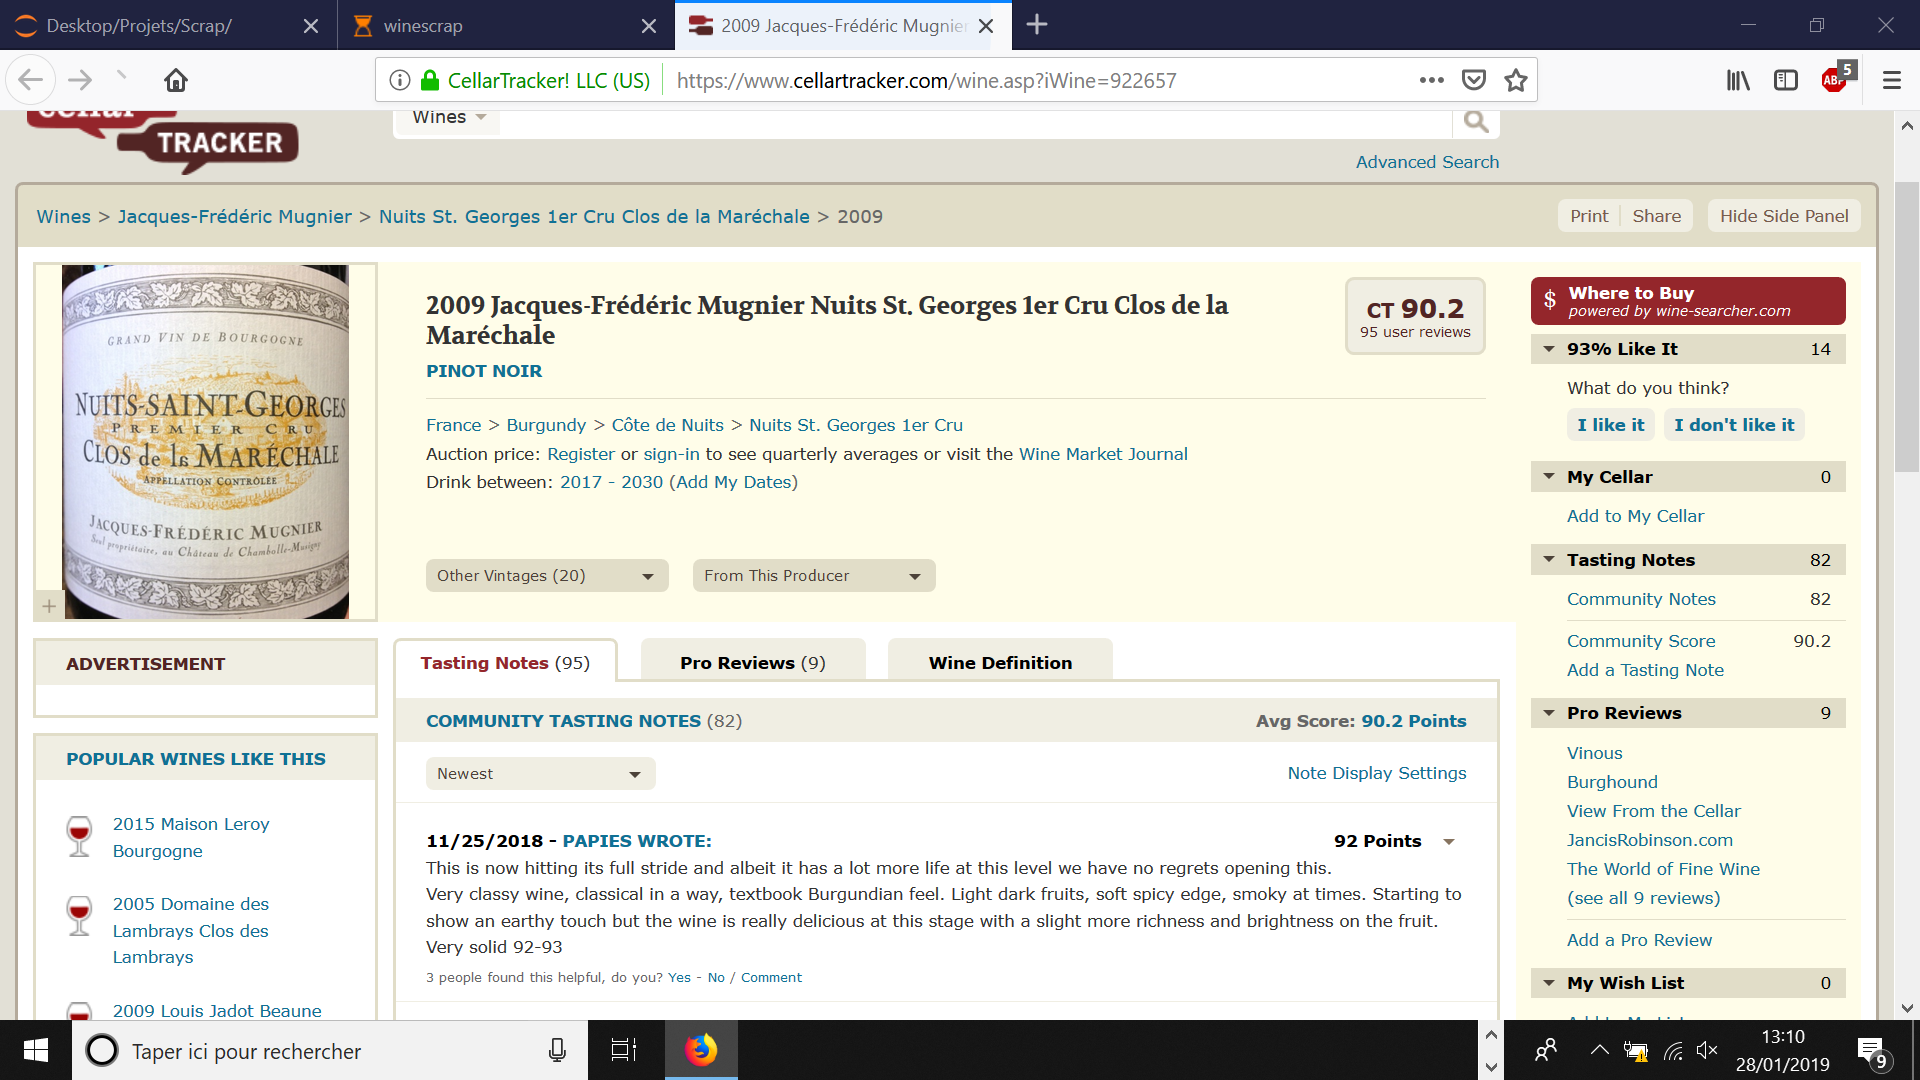

In [17]:
im2

## STEP 2.2 Image preprocessing

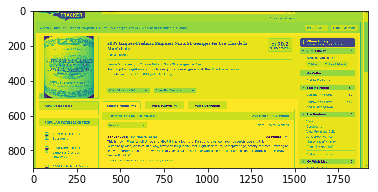

In [18]:
im=im2.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
img = np.asanyarray(im)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
plt.imshow(gray)

## STEP 2.3 Image analysis and segmentation

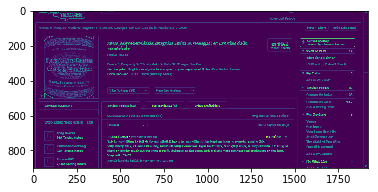

In [82]:
#alternative two : edge detection approach
elevation_map = skimage.filters.sobel(gray) #Sobel transformation for edge detection
plt.imshow(elevation_map)

(-0.5, 1919.5, 899.5, -0.5)

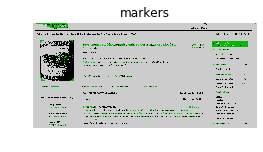

In [83]:
markers = np.zeros_like(gray)
markers[gray < 100] = 1
markers[gray > 200] = 2 # juste a little thresholding

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax.set_title('markers')
ax.axis('off')


(-0.5, 1919.5, 899.5, -0.5)

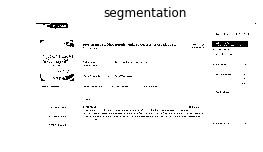

In [84]:

#segmentation with watershed algorithm
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('segmentation')
ax.axis('off')

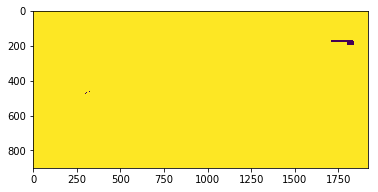

In [85]:
#text removal
kernel = np.ones((SIZE_KERNEL,SIZE_KERNEL),np.uint8)
segwonoise = cv2.erode(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #erosion
segwonoise2 = cv2.dilate(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #dilatation
#plt.imshow(segwonoise)
plt.imshow(segwonoise2)

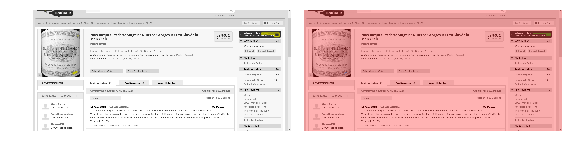

In [86]:


segmentation2 = ndi.binary_fill_holes(2 - segwonoise2) 
labeled_seg, _ = ndi.label(segmentation2) #label the different region
image_label_overlay = label2rgb(labeled_seg, image=gray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation2, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

## STEP 2.4 Get the region corresponding to the bottle

In [10]:
'''
def getImageIndex(markers,gray):
    nseg=markers.max()
    #if nseg==2:
    #    return(nseg)
    dmean={}
    for i in range(1,nseg+1):
        subgray=gray[markers==i]
        m=subgray.mean()
        milieu=(subgray.max()/2+subgray.min()/2)
        score=subgray[subgray<=m].std()+subgray[subgray>m].std()
        med=np.median(subgray)
        score3=np.abs(med-m)
        #score2=score
        score2=subgray[subgray<=milieu].std()+subgray[subgray>milieu].std()
        dmean[i]={"indice":i,"sd":gray[markers==i].std(),"mean" :m,"size":sum(sum(markers==i)),"score":score,"score2":score2,"score3":score3 }
    #(amaxd,maxd)=max(dmean.items())
    return(dmean)
    #return(amaxd)
'''
#this function take as @arg a np array of segmented and labelled regions and the gray image
#@return statistics as dict of each region
#for each region, get the average intensity, position, size, beta (based on skewness and kurtosis)
def getImageIndex(markers,gray):
    nseg=markers.max()
    #if nseg==2:
    #    return(nseg)
    dmean={}
    for i in range(1,nseg+1):
        #print(i)
        subgray=gray[markers==i]
        m=subgray.mean()
        milieu=(subgray.max()/2+subgray.min()/2)
        score=subgray[subgray<=m].std()+subgray[subgray>m].std()
        med=np.median(subgray)
        score3=np.abs(med-m)
        #score2=score
        score2=subgray[subgray<=milieu].std()+subgray[subgray>milieu].std()
        (x,y)=np.where(markers==i)
        xtarget=round(x.mean())
        ytarget=round(y.mean())
        beta=(scipy.stats.skew(subgray)**2+1)/scipy.stats.kurtosis(subgray)
        dmean[i]={"indice":i,"x":xtarget,"y":ytarget,"mean" :m,"sd":gray[markers==i].std(),"size":sum(sum(markers==i)),"beta":beta,"score":score,"score2":score2,"score3":score3 }
    #(amaxd,maxd)=max(dmean.items())
    return(dmean)
    #return(amaxd)

selMarkers=getImageIndex(labeled_seg,gray)
pdmarkers=pd.DataFrame(selMarkers).T
print(pdmarkers)

NameError: name 'labeled_seg' is not defined

466.0 310.0


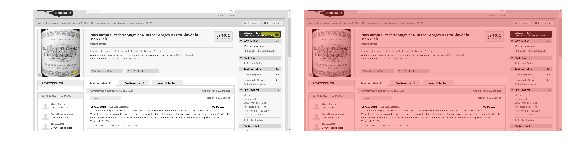

In [140]:
pdmarkers.score3[pdmarkers.score3==0]=np.inf
pdmarkers.beta[pdmarkers.sd==0]=np.inf
#who=pdmarkers.indice[pdmarkers.score3==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].score3)]
who=pdmarkers.indice[pdmarkers.beta==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].beta)]
(x,y)=np.where(labeled_seg==int(who))
xtarget=round(x.mean())
ytarget=round(y.mean())
print(xtarget,ytarget)


#image_label_overlay = label2rgb(labeled_seg==int(who), image=gray)
image_label_overlay = label2rgb(labeled_seg==14, image=gray)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(gray, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation2, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

In [96]:
#print(pdmarkers.iloc[who-1,:])
#print(who)
#print(pdmarkers.indice==int(who))
#print(pdmarkers[pdmarkers.indice==int(who),:])
print(pdmarkers[:2])
for idx, row in pdmarkers[:10].iterrows():
    print(idx)
    print(row["beta"])

       beta  indice  mean  score  score2  score3   sd    size      x       y
1 -0.333333     1.0  51.0    NaN     NaN     0.0  0.0     1.0    0.0    91.0
2 -0.333333     2.0  52.0    NaN     NaN     0.0  0.0  1975.0  178.0  1787.0
1
-0.3333333333333333
2
-0.3333333333333333
3
-0.693520376763766
4
-0.3333333333333333
5
-1.599202585436406


## STEP 2.5 Save the picture

In [ ]:
pya.moveTo(ytarget,HIGH_CROP+xtarget,TIME_TO_MOVE) #go to the pic
pya.click()
pya.moveTo(screenWidth / 2, screenHeight / 2,TIME_TO_MOVE)
pya.click(button="right")
pya.press(['s', 's','s','s','enter'])
pya.click()
time.sleep(0.1)
pya.typewrite(PICTURE)
pya.press(['enter','esc']) #save the picture

## STEP 2.6 Save the HTML file

In [ ]:
pya.hotkey('ctrl','u')
time.sleep(0.1)
pya.click(button="right")
pya.press(['e'])
time.sleep(0.1)
pya.typewrite(HTML)
pya.press(['enter']) #save the source code
pya.hotkey('ctrl','w') #close the page

# Bonus : Algorithme par renforcement + éventuellement classifieur bayésien naïf pour mieux identifier quelles régions correspondent à des images de bouteille et, dans le cas d'un échec de la segmentation, cliquer sur la zone de l'écran où la probabilité d'y voir l'image est maximale 

# STEP 3 Read HTML files to get informations

# STEP 4 Automatize

In [5]:
screenWidth, screenHeight = pya.size()
currentMouseX, currentMouseY = pya.position()
#for a given @arg url (url string), find the image on the page and save it. save html code too
#@return statistics of the selected region
#now, the function is upgraded with selectImageWithLearning for learning phase and selectImageReinforced for the late phase
#need getImageIndex function
def selectImage(url,numero=0,clickBeforeSave=True):
    pya.moveTo(0, screenHeight / 2)
    webbrowser.open(url)
    time.sleep(TIME_PAUSE)
    pya.scroll(-TO_SCROLL)
    time.sleep(.5)
    im2=pya.screenshot()
    im=im2.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
    img = np.asanyarray(im)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    elevation_map = skimage.filters.sobel(gray)
    markers = np.zeros_like(gray)
    markers[gray < 100] = 1
    markers[gray > 200] = 2
    segmentation = morphology.watershed(elevation_map, markers)
    kernel = np.ones((SIZE_KERNEL,SIZE_KERNEL),np.uint8)
    segwonoise = cv2.erode(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #erosion
    segwonoise2 = cv2.dilate(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #dilatation
    segmentation2 = ndi.binary_fill_holes(2 - segwonoise2) 
    labeled_seg, _ = ndi.label(segmentation2)
    selMarkers=getImageIndex(labeled_seg,gray)
    pdmarkers=pd.DataFrame(selMarkers).T
    pdmarkers.score3[pdmarkers.score3==0]=np.inf
    pdmarkers.beta[pdmarkers.sd==0]=np.inf
    who=pdmarkers.indice[pdmarkers.beta==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].beta)]
    (x,y)=np.where(labeled_seg==int(who))
    xtarget=round(x.mean())
    ytarget=round(y.mean())
    pya.moveTo(ytarget,HIGH_CROP+xtarget,TIME_TO_MOVE) #go to the pic
    pya.click()
    '''
    pya.moveTo(screenWidth / 2, screenHeight / 2,TIME_TO_MOVE)
    pya.click(button="right")
    #pya.press(['s', 's','s','s','enter'])
    pya.press(['down', 'down','down','down','enter'])
    #pya.click()
    time.sleep(0.1)
    namePic=str(numero)+".png"
    pya.typewrite(namePic)
    time.sleep(0.1)
    pya.press(['enter'])
    '''
    time.sleep(0.1)
    #pya.press(['o'])
    #time.sleep(0.1)
    #pya.press(['esc']) #escape from zoom
    #pya.hotkey('ctrl','w') #close window
    print("finiiiiiii")
    return(pdmarkers.iloc[who-1,:])

#i=4
#test=selectImage(D_URL[i]["URL"],i)


In [11]:
i=0
test=selectImage(D_URL[i]["URL"],i)
print(test)

C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


finiiiiiii
       beta  indice      mean     score     score2   score3         sd  \
2 -1.216579     2.0  95.38982  53.85724  57.450359  1.61018  50.516496   

      size      x      y  
2  83500.0  324.0  208.0  


In [90]:
i=14
test=selectImage(D_URL[i]["URL"],i)
print(test)

finiiiiiii
       beta  indice        mean      score     score2    score3         sd  \
5 -1.599203     5.0  144.371681  30.547483  34.071697  5.628319  30.591281   

    size      x      y  
5  113.0  466.0  310.0  


In [12]:

for idx, row in df.iterrows():
    #D_URL[idx]["STATS"]=test
    D_URL[idx]["STATS"]=selectImage(row['URL'],idx)
    #print(row['URL'])
    #webbrowser.open(row['URL'])

#D_URL[0]["stat"]=test
#print(pd.DataFrame(D_URL))

finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii
finiiiiiii


In [16]:
print(D_URL)

{0: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=940', 'STATS':        beta  indice       mean      score     score2    score3         sd  \
7 -1.238685     7.0  93.310141  53.696692  57.139098  0.689859  50.225931   

      size      x      y  
7  89440.0  322.0  206.0  }, 1: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=2383250', 'STATS':        beta  indice       mean      score     score2     score3         sd  \
8  1.402068     8.0  69.413371  57.372665  39.802497  17.413371  50.576391   

     size      x       y  
8  1062.0  182.0  1551.0  }, 2: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=2885171', 'STATS':        beta  indice       mean      score     score2     score3         sd  \
7 -2.491705     7.0  72.155571  73.140329  67.645772  10.155571  67.676131   

      size      x      y  
7  86218.0  317.0  207.0  }, 3: {'URL': 'https://www.cellartracker.com/wine.asp?iWine=2072263', 'STATS':        beta  indice       mean      score     score2    score3

In [13]:
dtest=pd.DataFrame(D_URL)
print(D_URL.keys())
D_BIS={}
for k in D_URL.keys():
    v=D_URL[k]['STATS']
    D_BIS[k]={'indice':int(v["indice"]),'x':float(v["x"]),'y':float(v["y"]),'size':float(v["size"]),'beta':float(v["beta"]),'mean':float(v["mean"]),'sd':float(v["sd"])}

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])


In [14]:
print(float(D_URL[0]["STATS"]["mean"]))
print(pd.DataFrame(D_BIS).T)
results = pd.DataFrame(D_BIS).T

95.38982035928144
         beta  indice        mean         sd     size      x      y
0   -1.216579     2.0   95.389820  50.516496  83500.0  324.0  208.0
1    1.120954     3.0    8.044705  28.776651   2304.0  268.0  208.0
2   -2.292170     2.0   72.437582  69.136498  79512.0  317.0  208.0
3   -0.683989     2.0   79.285824  51.271365  47043.0  289.0  240.0
4    0.683800     2.0  106.211205  26.099483  57958.0  306.0  206.0
5    0.464459     2.0   40.747334  15.099133  27851.0  332.0  207.0
6   -2.154553     2.0   67.133570  47.928852  56884.0  311.0  192.0
7   -8.138663     4.0   80.746924  41.631791  20725.0  431.0  179.0
8    0.687325     3.0    9.908892  12.032490   8232.0  279.0  217.0
9    0.584734     4.0   56.451165  17.664554   7208.0  353.0  207.0
10  -2.532269     4.0   44.264056  39.192974   2988.0  458.0  180.0
11  -2.297376     2.0   92.958931  38.797960  83493.0  324.0  207.0
12   4.301204     2.0   58.118719  67.370695  83500.0  324.0  208.0
13  -1.263997     2.0   89.307

In [92]:
logV=np.zeros_like(gray)
dMel=np.zeros_like(gray)
(nr,nc)=logV.shape
v1=np.array(range(nr))
v1.shape=(nr,1)
matR=np.dot(v1,np.ones((1,nc)))
v2=np.array(range(nc))
v2.shape=(1,nc)
matC=np.dot(np.ones((nr,1)),v2)
sigma=50
(N,dummy)=results.shape
for idx, row in results.iterrows():
    logV=logV-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2)
    dMel=dMel+np.exp(-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2))
dMel=dMel/N

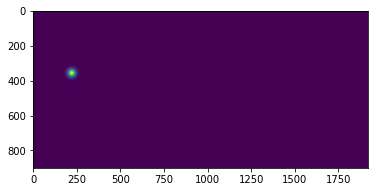

In [94]:
fig, ax = plt.subplots()
im = ax.imshow(np.exp(logV))

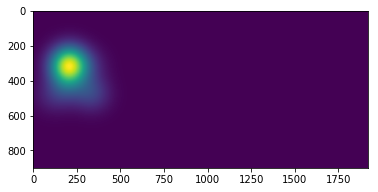

In [93]:
#with a mixture law
fig, ax = plt.subplots()
im = ax.imshow(dMel)

(array([9., 0., 1., 1., 0., 2., 2., 0., 0., 6.]),
 array([  113. ,  8451.7, 16790.4, 25129.1, 33467.8, 41806.5, 50145.2,
        58483.9, 66822.6, 75161.3, 83500. ]),
 <a list of 10 Patch objects>)

C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


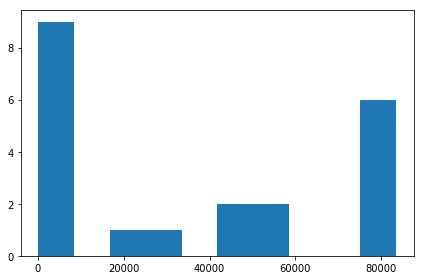

In [36]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(results["size"])

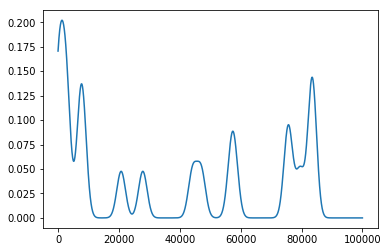

'\n(nr,nc)=logV.shape\nv1=np.array(range(nr))\nv1.shape=(nr,1)\nmatR=np.dot(v1,np.ones((1,nc)))\nv2=np.array(range(nc))\nv2.shape=(1,nc)\nmatC=np.dot(np.ones((nr,1)),v2)\nsigma=100\n(N,dummy)=results.shape\nfor idx, row in results.iterrows():\n    logV=logV-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2)\n    dMel=dMel+np.exp(-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2))\ndMel=dMel/N\n'

In [41]:

xBeta=np.arange(-25,25,0.1)
yBeta=np.zeros_like(xBeta)
xSize=np.arange(0,100000,10)
ySize=np.zeros_like(xSize)
#print(yBeta)
sigmaBeta=1
sigmaSize=1000
for idx, row in results.iterrows():
    yBeta=yBeta+np.exp(-((xBeta-row["beta"])/(2*sigmaBeta))**2)
    ySize=ySize+np.exp(-((xSize-row["size"])/(2*sigmaSize))**2)
yBeta=yBeta/N
ySize=ySize/N
plt.plot(xSize,ySize)
plt.show()

#useless block after
'''
(nr,nc)=logV.shape
v1=np.array(range(nr))
v1.shape=(nr,1)
matR=np.dot(v1,np.ones((1,nc)))
v2=np.array(range(nc))
v2.shape=(1,nc)
matC=np.dot(np.ones((nr,1)),v2)
sigma=100
(N,dummy)=results.shape
for idx, row in results.iterrows():
    logV=logV-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2)
    dMel=dMel+np.exp(-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2))
dMel=dMel/N
'''

In [204]:
#check if we clicked on image (@return True) or elsewhere (@return False)
#@arg the gray image as np array before clicked and parameters : @arg threshIntensity the threshold of which the intensity of two pixels is considered as different
#if pixel with less than @arg threshPixDiffMin, no image selected, if > @arg threshPixDiffMax, click n external link and change the page
def isGoodClick(grayOriginal,threshIntensityDiff=10,threshPixDiffMin=1000,threshPixDiffMax=800000):
    imT=pya.screenshot()
    imTC=imT.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
    imTG = np.asanyarray(imTC)
    testgray = cv2.cvtColor(imTG,cv2.COLOR_BGR2GRAY)
    (nr,nc)=grayOriginal.shape
    pixDiff=sum(sum(np.abs(grayOriginal-testgray)>threshIntensityDiff))
    #print(pixDiff)
    if(pixDiff<threshPixDiffMin):
        print("no image selected")
        return(False)
    if(pixDiff>threshPixDiffMax):
        print("URL changed")
        return(False)
    print("image selected")
    return(True)
'''
webbrowser.open(URL)
time.sleep(TIME_PAUSE)
pya.scroll(-TO_SCROLL)
time.sleep(.5)
dummy1=pya.screenshot()
dummy2=dummy1.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
dummy3 = np.asanyarray(dummy2)
dummygray = cv2.cvtColor(dummy3,cv2.COLOR_BGR2GRAY)
time.sleep(.5)
pya.moveTo(208,HIGH_CROP+324,TIME_TO_MOVE) #go to the pic
pya.click()
isGoodClick(dummygray)
'''

'\nwebbrowser.open(URL)\ntime.sleep(TIME_PAUSE)\npya.scroll(-TO_SCROLL)\ntime.sleep(.5)\ndummy1=pya.screenshot()\ndummy2=dummy1.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image\ndummy3 = np.asanyarray(dummy2)\ndummygray = cv2.cvtColor(dummy3,cv2.COLOR_BGR2GRAY)\ntime.sleep(.5)\npya.moveTo(208,HIGH_CROP+324,TIME_TO_MOVE) #go to the pic\npya.click()\nisGoodClick(dummygray)\n'

In [205]:
#for a given @arg url, get the region considered as image and learn and update parameters characteristic of this egion, in function of success or not
def selectImageWithLearning(url,numero=0,clickBeforeSave=True):
    screenWidth, screenHeight = pya.size()
    currentMouseX, currentMouseY = pya.position()
    pya.moveTo(0, screenHeight / 2)
    webbrowser.open(url)
    time.sleep(TIME_PAUSE)
    pya.scroll(-TO_SCROLL)
    time.sleep(.5)
    im2=pya.screenshot()
    im=im2.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
    img = np.asanyarray(im)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    elevation_map = skimage.filters.sobel(gray)
    markers = np.zeros_like(gray)
    markers[gray < 100] = 1
    markers[gray > 200] = 2
    segmentation = morphology.watershed(elevation_map, markers)
    kernel = np.ones((SIZE_KERNEL,SIZE_KERNEL),np.uint8)
    segwonoise = cv2.erode(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #erosion
    segwonoise2 = cv2.dilate(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #dilatation
    segmentation2 = ndi.binary_fill_holes(2 - segwonoise2) 
    labeled_seg, _ = ndi.label(segmentation2)
    selMarkers=getImageIndex(labeled_seg,gray)
    pdmarkers=pd.DataFrame(selMarkers).T
    pdmarkers.score3[pdmarkers.score3==0]=np.inf
    pdmarkers.beta[pdmarkers.sd==0]=np.inf
    who=pdmarkers.indice[pdmarkers.beta==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].beta)]
    (x,y)=np.where(labeled_seg==int(who))
    xtarget=round(x.mean())
    ytarget=round(y.mean())
    pya.moveTo(ytarget,HIGH_CROP+xtarget,TIME_TO_MOVE) #go to the pic
    pya.click()
    time.sleep(0.1)
    success=isGoodClick(gray)
    #print(success)
    pdmarkers["SUCCESS"]=success
    '''
    pya.moveTo(screenWidth / 2, screenHeight / 2,TIME_TO_MOVE)
    pya.click(button="right")
    #pya.press(['s', 's','s','s','enter'])
    pya.press(['down', 'down','down','down','enter'])
    #pya.click()
    time.sleep(0.1)
    namePic=str(numero)+".png"
    pya.typewrite(namePic)
    time.sleep(0.1)
    pya.press(['enter'])
    time.sleep(0.1)
    '''
    #pya.press(['o'])
    #time.sleep(0.1)
    #pya.press(['esc']) #escape from zoom
    #pya.hotkey('ctrl','w') #close window
    
    #print("finiiiiiii")
    return(pdmarkers.iloc[who-1,:])


In [128]:
'''
D_SAMPLE = { your_key: D_URL[your_key] for your_key in [10] }
df2=pd.DataFrame(D_SAMPLE).T
'''

In [129]:
'''
for idx, row in df2.iterrows():
    #print(idx)
    #print(D_SAMPLE[idx])
    #D_URL[idx]["STATS"]=test
    D_SAMPLE[idx]["STATS"]=selectImageWithLearning(row['URL'],idx)
    #print(row['URL'])
    #webbrowser.open(row['URL'])

'''

627012
image selected
True


In [138]:
#D_SAMPLE[10]['STATS']['SUCCESS'].bool()

True

In [141]:
screenWidth, screenHeight = pya.size()
#@arg a dict of url train and learning parameters
#@return dict of learned parameters
#for each url in the dict, get the image, check the success, update learning parameters (as distribution probability function), save the image and html code
def trainImageRecognition(train,sigmaXY=50,sigmaBeta=1,sigmaSize=1000):
    df_train=pd.DataFrame(train).T
    for idx, row in df_train.iterrows():
        train[idx]["STATS"]=selectImageWithLearning(row['URL'],idx)
    D_BIS={}
    for k in train.keys():
        v=train[k]['STATS']
        #print(v["SUCCESS"].bool())
        #print(float(v["x"]))
        D_BIS[k]={'indice':int(v["indice"]),'x':float(v["x"]),'y':float(v["y"]),'size':float(v["size"]),'beta':float(v["beta"]),'mean':float(v["mean"]),'sd':float(v["sd"]),'success':v["SUCCESS"].bool()}
    result_train=pd.DataFrame(D_BIS).T
    dMel=np.zeros((screenHeight-HIGH_CROP-DOWN_CROP,screenWidth))
    (nr,nc)=dMel.shape
    v1=np.array(range(nr))
    v1.shape=(nr,1)
    matR=np.dot(v1,np.ones((1,nc)))
    v2=np.array(range(nc))
    v2.shape=(1,nc)
    matC=np.dot(np.ones((nr,1)),v2)
    xBeta=np.arange(-25,25,0.1)
    yBeta=np.zeros_like(xBeta)
    xSize=np.arange(0,100000,10)
    ySize=np.zeros_like(xSize)
    for idx, row in result_train.iterrows():
        #print(row["success"])
        if(bool(row["success"])):
            yBeta=yBeta+np.exp(-((xBeta-row["beta"])/(2*sigmaBeta))**2)
            ySize=ySize+np.exp(-((xSize-row["size"])/(2*sigmaSize))**2)
            dMel=dMel+np.exp(-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2))
        else:
            yBeta=yBeta+(1-np.exp(-((xBeta-row["beta"])/(2*sigmaBeta))**2))
            ySize=ySize+(1-np.exp(-((xSize-row["size"])/(2*sigmaSize))**2))
            dMel=dMel+(1-np.exp(-((matR-row["x"])**2+(matC-row["y"])**2)/((2*sigma)**2)))
    yBeta=yBeta/N
    ySize=ySize/N
    dMel=dMel/N
    return({"x_beta_train":xBeta,"y_beta_train":yBeta,"x_size_train":xSize,"y_size_train":ySize,"XY_train":dMel})

### Training phase

In [160]:
#D_SAMPLE = { your_key: D_URL[your_key] for your_key in [2]}
train_results=trainImageRecognition(D_URL) #training

626228
image selected
True
606875
image selected
True
625852
image selected
True
630155
image selected
True
606052
image selected
True
629053
image selected
True
625880
image selected
True
627654
image selected
True
631849
image selected
True
626704
image selected
True
626962
image selected
True
625913
image selected
True
626561
image selected
True
626495
image selected
True
626248
image selected
True
625812
image selected
True
626781
image selected
True
626285
image selected
True
626679
image selected
True
626756
image selected
True
626007
image selected
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


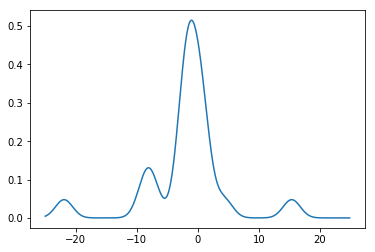

In [180]:
#check the probability distribution of variables of interest after training
#the beta variable
plt.plot(train_results["x_beta_train"],train_results["y_beta_train"])

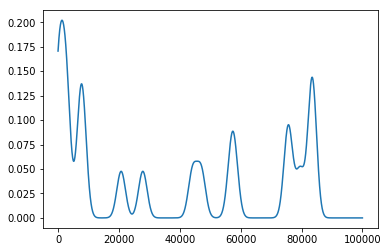

In [181]:
#the size of the image
plt.plot(train_results["x_size_train"],train_results["y_size_train"])

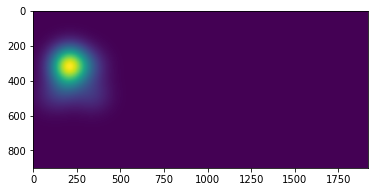

In [182]:
#the position of the image
plt.imshow(train_results["XY_train"])

In [194]:
#for a given @arg url as string, with a trained dict and learning parameters, learn image parameters thanks to the already trained dictionary
#select the image that maximizes likelihood according to the probability distribution learned in the training phase
#these distributions are still updated here
def selectImageReinforced(url,trained,n_trained=1,sigmaXY=50,sigmaBeta=1,sigmaSize=1000,numero=0,clickBeforeSave=True):
    pya.moveTo(0, screenHeight / 2)
    webbrowser.open(url)
    time.sleep(TIME_PAUSE)
    pya.scroll(-TO_SCROLL)
    time.sleep(.5)
    im2=pya.screenshot()
    im=im2.crop((0,HIGH_CROP,screenWidth,screenHeight-DOWN_CROP)) #crop image
    img = np.asanyarray(im)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to gray
    elevation_map = skimage.filters.sobel(gray)
    markers = np.zeros_like(gray)
    markers[gray < 100] = 1
    markers[gray > 200] = 2
    segmentation = morphology.watershed(elevation_map, markers)
    kernel = np.ones((SIZE_KERNEL,SIZE_KERNEL),np.uint8)
    segwonoise = cv2.erode(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #erosion
    segwonoise2 = cv2.dilate(np.array(segmentation,dtype="uint8"),kernel, iterations = ITER_KERNEL) #dilatation
    segmentation2 = ndi.binary_fill_holes(2 - segwonoise2) 
    labeled_seg, _ = ndi.label(segmentation2)
    selMarkers=getImageIndex(labeled_seg,gray)
    pdmarkers=pd.DataFrame(selMarkers).T
    #pdmarkers.score3[pdmarkers.score3==0]=np.inf
    pdmarkers.beta[pdmarkers.sd==0]=np.inf
    (rowfind,colfind)=pdmarkers.shape
    vraisemblance=np.zeros(rowfind)
    for idx, row in pdmarkers.iterrows():
        #print(idx)
        if(pdmarkers.sd[idx]==0):
            vraisT=-np.inf
        else:
            vraisBeta=trained["y_beta_train"][np.abs(trained["x_beta_train"]-row["beta"]).argmin()]
            vraisSize=trained["y_size_train"][np.abs(trained["x_size_train"]-row["size"]).argmin()]
            vraisXY=trained["XY_train"][int(np.floor(row["x"])),int(np.floor(row["y"]))]
            vraisemblance[idx-1]=-np.log(vraisBeta)-np.log(vraisSize)-np.log(vraisXY)  
    #who=pdmarkers.indice[pdmarkers.beta==min(pdmarkers[pdmarkers["size"]>SIZE_MIN].beta)]
    who=vraisemblance.argmax()+1
    (x,y)=np.where(labeled_seg==int(who))
    xtarget=round(x.mean())
    ytarget=round(y.mean())
    pya.moveTo(ytarget,HIGH_CROP+xtarget,TIME_TO_MOVE) #go to the pic
    pya.click()
    time.sleep(0.1)
    success=isGoodClick(gray)
    #n_trained*trained["y_beta_train"]+
    pdmarkers["SUCCESS"]=success
    ## update likelihood

    newBeta=pdmarkers["beta"][who]
    newSize=pdmarkers["size"][who]
    (nr,nc)=trained["XY_train"].shape
    v1=np.array(range(nr))
    v1.shape=(nr,1)
    matR=np.dot(v1,np.ones((1,nc)))
    v2=np.array(range(nc))
    v2.shape=(1,nc)
    matC=np.dot(np.ones((nr,1)),v2)
    if(bool(success)):
        yBeta=(n_trained*trained["y_beta_train"]+np.exp(-((newBeta-trained["x_beta_train"])/(2*sigmaBeta))**2))/(n_trained+1)
        ySize=(n_trained*trained["y_size_train"]+np.exp(-((newSize-trained["x_size_train"])/(2*sigmaSize))**2))/(n_trained+1)
        #ySize=ySize+np.exp(-((xSize-row["size"])/(2*sigmaSize))**2)
        dMel=(n_trained*trained["XY_train"]+np.exp(-((matR-xtarget)**2+(matC-ytarget)**2)/((2*sigma)**2)))/(n_trained+1)
        #dMel=(n_trained*trained["XY_train"]+np.exp(-((newBeta-trained["x_beta_train"])/(2*sigmaBeta))**2))/(n_trained+1)
    else:
        yBeta=(n_trained*trained["y_beta_train"]+1-np.exp(-((newBeta-trained["x_beta_train"])/(2*sigmaBeta))**2))/(n_trained+1)
        ySize=(n_trained*trained["y_size_train"]+1-np.exp(-((newSize-trained["x_size_train"])/(2*sigmaSize))**2))/(n_trained+1)
        dMel=(n_trained*trained["XY_train"]+1-np.exp(-((matR-xtarget)**2+(matC-ytarget)**2)/((2*sigma)**2)))/(n_trained+1)
    
    '''
    pya.moveTo(screenWidth / 2, screenHeight / 2,TIME_TO_MOVE)
    pya.click(button="right")
    #pya.press(['s', 's','s','s','enter'])
    pya.press(['down', 'down','down','down','enter'])
    #pya.click()
    time.sleep(0.1)
    namePic=str(numero)+".png"
    pya.typewrite(namePic)
    time.sleep(0.1)
    pya.press(['enter'])
    time.sleep(0.1)
    '''
    #pya.press(['o'])
    #time.sleep(0.1)
    #pya.press(['esc']) #escape from zoom
    #pya.hotkey('ctrl','w') #close window
    
    #print("finiiiiiii")
    trained["y_beta_train"]=yBeta
    trained["y_size_train"]=ySize
    trained["XY_train"]=dMel
    return(trained)

'''
def trainReinforcedImageRecognition(train,sigmaXY=50,sigmaBeta=1,sigmaSize=1000):
'''   

'\ndef trainReinforcedImageRecognition(train,sigmaXY=50,sigmaBeta=1,sigmaSize=1000):\n'

In [195]:
'''
D_SAMPLE = { your_key: D_URL[your_key] for your_key in [11,1,8] }
df2=pd.DataFrame(D_SAMPLE).T
trainCopy=train_results.copy()
n_reinforce=21
for idx, row in df2.iterrows():
    trainCopy=selectImageReinforced(row['URL'],trainCopy,n_reinforce)
    n_reinforce=n_reinforce+1

'''



C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\lucas.michon\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


625915
image selected
606875
image selected
631847
image selected


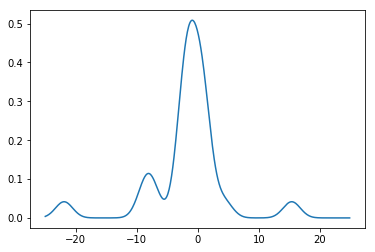

In [196]:
#plt.plot(trainCopy["x_beta_train"],trainCopy["y_beta_train"])

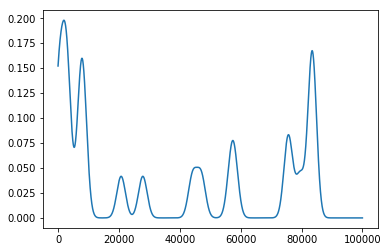

In [197]:
#plt.plot(trainCopy["x_size_train"],trainCopy["y_size_train"])

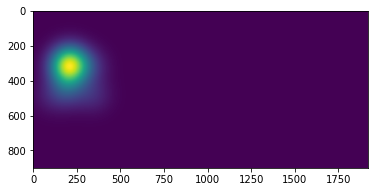

In [198]:
#plt.imshow(trainCopy["XY_train"])

### test phase : image recognition thanks to learned probabilities

D_TEST={}
D_TEST[0]={"URL":"https://www.cellartracker.com/wine.asp?iWine=931851"}
D_TEST[1]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2117535"}
D_TEST[2]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2976407"}
D_TEST[3]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2589754"}
D_TEST[4]={"URL":"https://www.cellartracker.com/wine.asp?iWine=927164"}
D_TEST[5]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2398301"}
D_TEST[6]={"URL":"https://www.cellartracker.com/wine.asp?iWine=875337"}
D_TEST[7]={"URL":"https://www.cellartracker.com/wine.asp?iWine=749548"}
D_TEST[8]={"URL":"https://www.cellartracker.com/wine.asp?iWine=901270"}
D_TEST[9]={"URL":"https://www.cellartracker.com/wine.asp?iWine=2046867"}

In [207]:
df2=pd.DataFrame(D_TEST).T
trainCopy=train_results.copy()
n_reinforce=21
for idx, row in df2.iterrows():
    trainCopy=selectImageReinforced(row['URL'],trainCopy,n_reinforce)
    n_reinforce=n_reinforce+1



image selected
image selected
no image selected
image selected
image selected
image selected
image selected
image selected
image selected
image selected


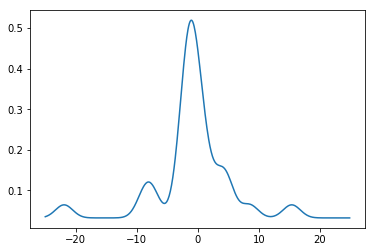

In [208]:
#check the probability distribution
plt.plot(trainCopy["x_beta_train"],trainCopy["y_beta_train"])

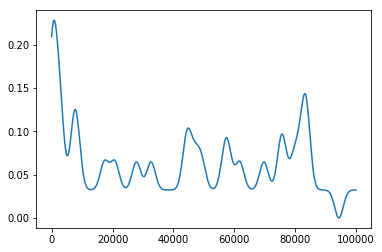

In [209]:
plt.plot(trainCopy["x_size_train"],trainCopy["y_size_train"])

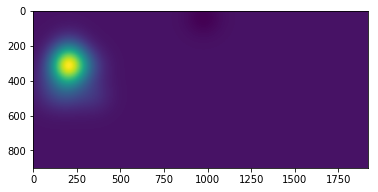

In [210]:
plt.imshow(trainCopy["XY_train"])